# Core Periphery

## Import

In [2]:
import scipy.optimize
from scipy.optimize import fsolve
from scipy.optimize import minimize
import math
from math import *
import matplotlib
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle

## Parameters

In [ ]:
phi1=0.5
#phi2=0.5
gam=0.4
L=2
rho=0.7 # Group 7
eps=1/(1-rho)
bet=0.8
alp=0.08 
delta=0.45 # Group 7
T_lambda = []
T_T = []
T_Stab=[]
fig = plt.figure()
lines = ["-","--","-.",":","+","."]
color = ["Black","Green","Red","Yellow","Purple","Grey"]
colstab = ["Red","Black"]
T = 1.9 # Group 7
indx = 0  # Needed for plotting styles
file = open("Results.txt","w") # Creates new file
lamh_min=1
lamh_max=99
lamh_step=1
lamh_div=100

<Figure size 640x480 with 0 Axes>

## Loop

In [14]:
lamda = [] # Creates empty lists
Relative = [] 
Welfare = []
W_Man_H = []
W_Man_F = []
W_Farm_H = [] 
W_FRamF = []

for lamh in range (lamh_min,lamh_max,lamh_step): # iterates over all values of lambda
    lam  = lamh/lamh_div # from integer to float

    def equations(p):
        Y1, Y2, W1, W2, I1, I2 = p
        return(Y1-phi1*(1-gam)*L-lam*gam*L*W1,
                Y2-(1-phi1)*(1-gam)*L-(1-lam)*gam*L*W2,
                W1-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(Y1*I1**(eps-1)+T**(1-eps)*Y2*I2**(eps-1))**(1/eps),
                W2-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(T**(1-eps)*Y1*I1**(eps-1)+Y2*I2**(eps-1))**(1/eps),
                I1-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*W1**(1-eps)+(1-lam)*T**(1-eps)*W2**(1-eps))**(1/(1-eps)),
                I2-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*T**(1-eps)*W1**(1-eps)+(1-lam)*W2**(1-eps))**(1/(1-eps)))

    Y1, Y2, W1, W2, I1, I2 = fsolve(equations, (1, 1, 1, 1, 1, 1),xtol=1e-10)
    Rel = (W1/I1**delta)/(W2/I2**delta)
    Welf = Y1/(I1**delta)+Y2/(I2**delta)
    Man_H=W1/I1**delta
    Man_F=W2/I2**delta
    Farm_H=1/I1**delta
    Farm_F=1/I2**delta

    lamda.append(lam) # .append adds value at the end of the list
    Welfare.append(Welf)
    Relative.append(Rel)
    W_Man_H.append(Man_H)
    W_Man_F.append(Man_F)
    W_Farm_H.append(Farm_H)
    W_FRamF.append(Farm_F)

## Figures

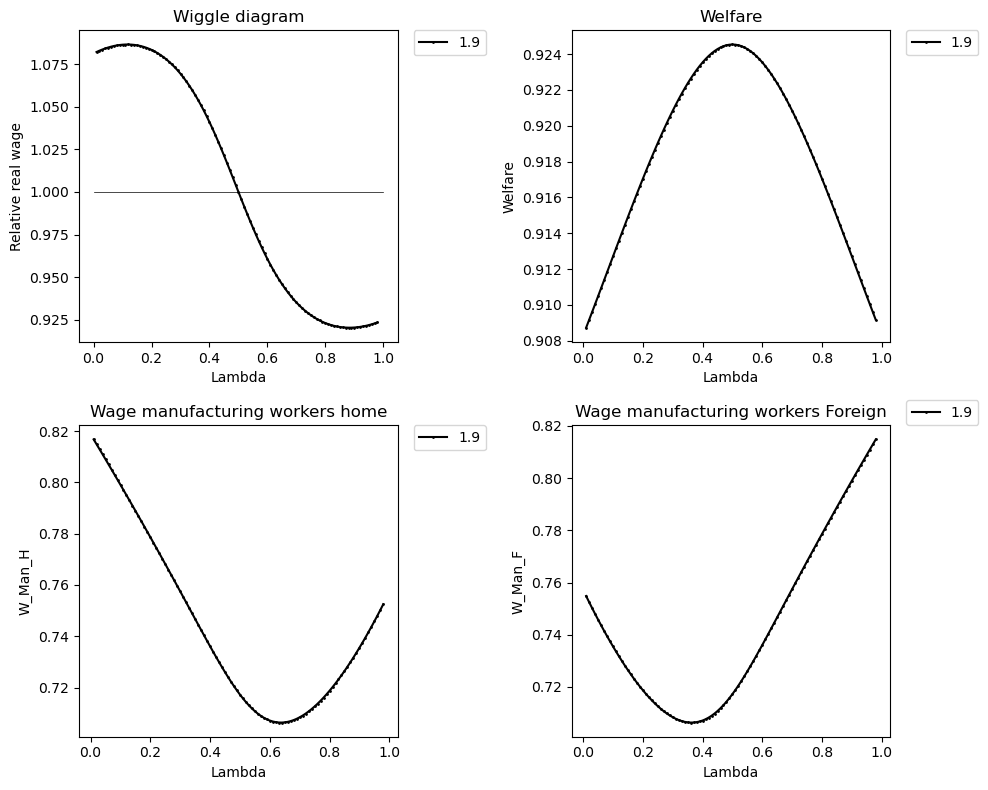

In [15]:
# Create a figure and axes using subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Create a 2x2 grid of subplots

# Plot for ax1 (top-left)
axs[0, 0].plot(lamda, Relative, lines[indx], marker="o", color=color[indx], markersize=1, label=T)
axs[0, 0].plot([0, 1], [1, 1], 'k-', lw=0.5)
axs[0, 0].set_ylabel('Relative real wage')
axs[0, 0].set_xlabel('Lambda')
axs[0, 0].set_title('Wiggle diagram')
axs[0, 0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Plot for ax2 (top-right)
axs[0, 1].plot(lamda, Welfare, lines[indx], marker="o", color=color[indx], markersize=1, label=T)
axs[0, 1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[0, 1].set_ylabel('Welfare')
axs[0, 1].set_xlabel('Lambda')
axs[0, 1].set_title('Welfare')

# Plot for ax3 (bottom-left)
axs[1, 0].plot(lamda, W_Man_H, lines[indx], marker="o", color=color[indx], markersize=1, label=T)
axs[1, 0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[1, 0].set_ylabel('W_Man_H')
axs[1, 0].set_xlabel('Lambda')
axs[1, 0].set_title('Wage manufacturing workers home')

# Plot for ax4 (bottom-right)
axs[1, 1].plot(lamda, W_Man_F, lines[indx], marker="o", color=color[indx], markersize=1, label=T)
axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)
axs[1, 1].set_ylabel('W_Man_F')
axs[1, 1].set_xlabel('Lambda')
axs[1, 1].set_title('Wage manufacturing workers Foreign')

# Adjust layout to make sure everything fits without overlap
plt.tight_layout()


## Wiggle Diagram by itself

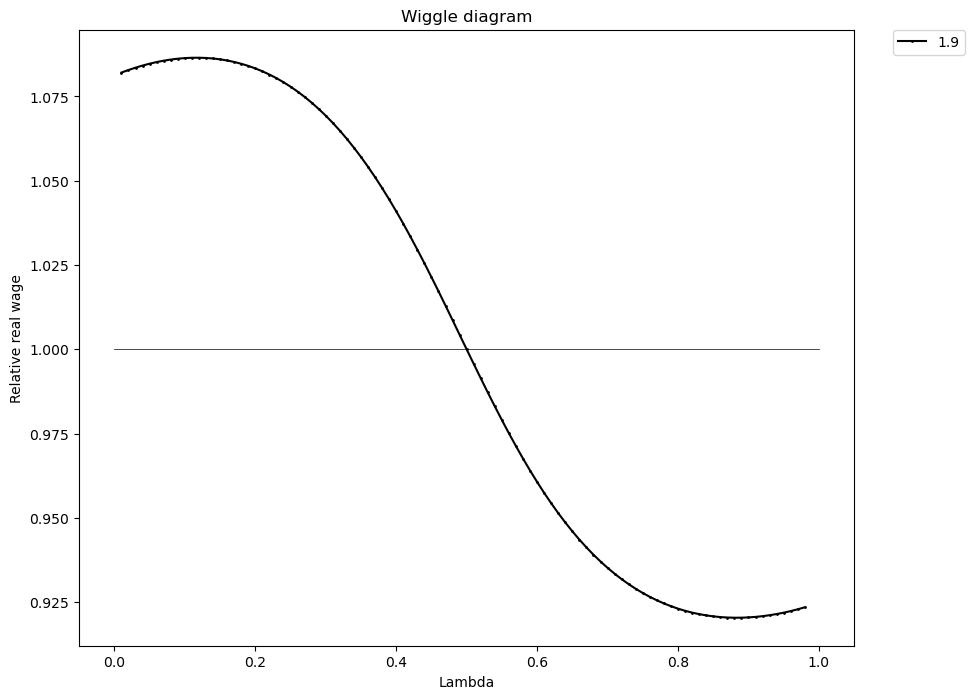

In [16]:
fig, wiggle = plt.subplots(1, 1, figsize=(10, 8))  # Create a 2x2 grid of subplots

# Plot for ax1 (top-left)
wiggle.plot(lamda, Relative, lines[indx], marker="o", color=color[indx], markersize=1, label=T)
wiggle.plot([0, 1], [1, 1], 'k-', lw=0.5)
wiggle.set_ylabel('Relative real wage')
wiggle.set_xlabel('Lambda')
wiggle.set_title('Wiggle diagram')
wiggle.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## Exercise 2a: $\varphi_1 = 0.55$

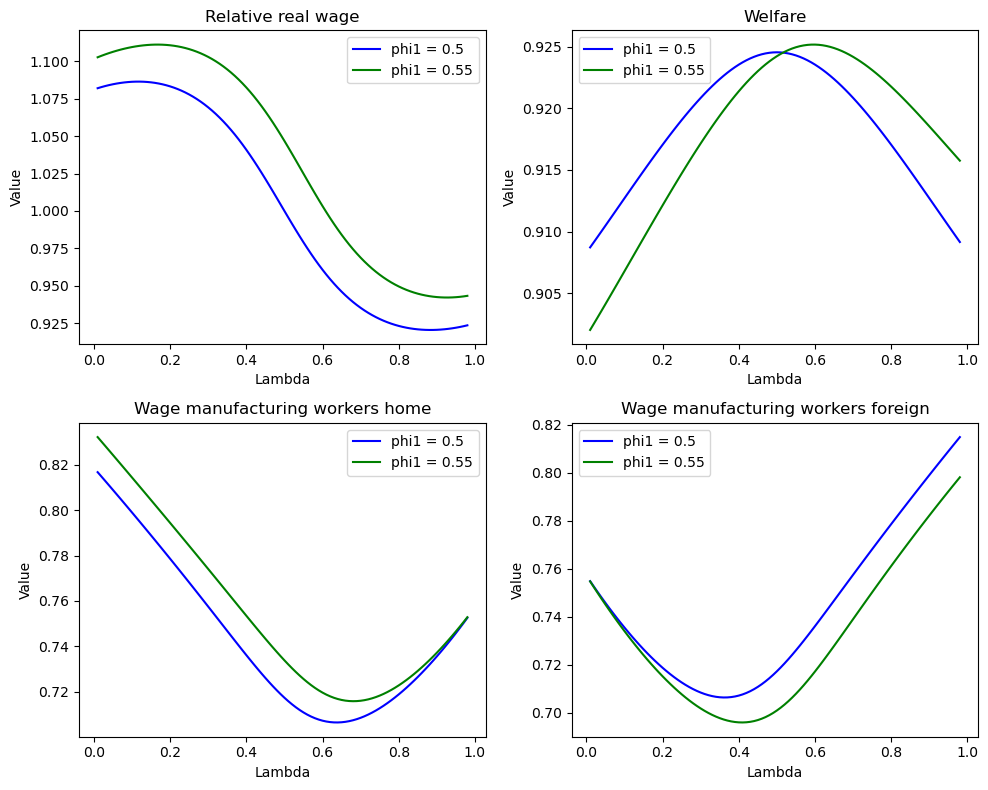

In [ ]:
# Store results for two different phi1 values
phi_values = [0.5, 0.55]
results = {}

for phi1 in phi_values:
    phi2 = 1 - phi1

    lamda = []
    Relative = [] 
    Welfare = []
    W_Man_H = []
    W_Man_F = []

    for lamh in range(lamh_min, lamh_max, lamh_step):
        lam = lamh / lamh_div

        def equations(p):
            Y1, Y2, W1, W2, I1, I2 = p
            return (
                Y1 - phi1 * (1 - gam) * L - lam * gam * L * W1,
                Y2 - (1 - phi1) * (1 - gam) * L - (1 - lam) * gam * L * W2,
                W1 - rho * bet ** (-rho) * (delta / (alp * (eps - 1))) ** (1 / eps) * 
                     (Y1 * I1 ** (eps - 1) + T ** (1 - eps) * Y2 * I2 ** (eps - 1)) ** (1 / eps),
                W2 - rho * bet ** (-rho) * (delta / (alp * (eps - 1))) ** (1 / eps) * 
                     (T ** (1 - eps) * Y1 * I1 ** (eps - 1) + Y2 * I2 ** (eps - 1)) ** (1 / eps),
                I1 - (gam * L / (alp * eps)) ** (1 / (1 - eps)) * (bet / rho) * 
                     (lam * W1 ** (1 - eps) + (1 - lam) * T ** (1 - eps) * W2 ** (1 - eps)) ** (1 / (1 - eps)),
                I2 - (gam * L / (alp * eps)) ** (1 / (1 - eps)) * (bet / rho) * 
                     (lam * T ** (1 - eps) * W1 ** (1 - eps) + (1 - lam) * W2 ** (1 - eps)) ** (1 / (1 - eps))
            )

        Y1, Y2, W1, W2, I1, I2 = fsolve(equations, (1, 1, 1, 1, 1, 1), xtol=1e-10)
        Rel = (W1 / I1 ** delta) / (W2 / I2 ** delta)
        Welf = Y1 / (I1 ** delta) + Y2 / (I2 ** delta)
        Man_H = W1 / I1 ** delta
        Man_F = W2 / I2 ** delta

        lamda.append(lam)
        Relative.append(Rel)
        Welfare.append(Welf)
        W_Man_H.append(Man_H)
        W_Man_F.append(Man_F)

    results[phi1] = {
        "lamda": lamda,
        "Relative": Relative,
        "Welfare": Welfare,
        "W_Man_H": W_Man_H,
        "W_Man_F": W_Man_F
    }

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
colors = {0.5: "blue", 0.55: "green"}
labels = {0.5: "phi1 = 0.5", 0.55: "phi1 = 0.55"}

for phi1 in phi_values:
    data = results[phi1]

    axs[0, 0].plot(data["lamda"], data["Relative"], color=colors[phi1], label=labels[phi1])
    axs[0, 1].plot(data["lamda"], data["Welfare"], color=colors[phi1], label=labels[phi1])
    axs[1, 0].plot(data["lamda"], data["W_Man_H"], color=colors[phi1], label=labels[phi1])
    axs[1, 1].plot(data["lamda"], data["W_Man_F"], color=colors[phi1], label=labels[phi1])

# Titles and labels
axs[0, 0].set_title("Relative real wage")
axs[0, 1].set_title("Welfare")
axs[1, 0].set_title("Wage manufacturing workers home")
axs[1, 1].set_title("Wage manufacturing workers foreign")

for ax in axs.flat:
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Value")
    ax.legend()

plt.tight_layout()
plt.show()


## Exercise 2b: Decrease in $\gamma$

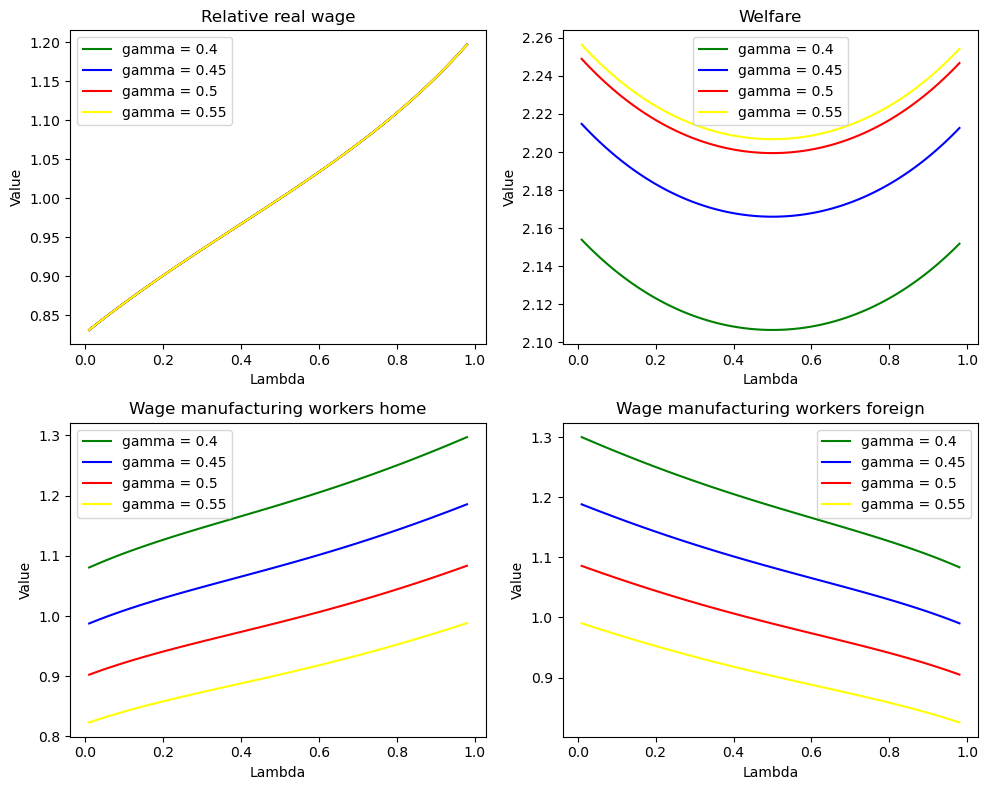

In [8]:
# Store results for multiple different gamma values
phi1=0.5
gamma_values = [0.4, 0.45, 0.5, 0.55]
results = {}

for gam in gamma_values:
    lamda = []
    Relative = [] 
    Welfare = []
    W_Man_H = []
    W_Man_F = []

    for lamh in range(lamh_min, lamh_max, lamh_step):
        lam = lamh / lamh_div

        def equations(p):
            Y1, Y2, W1, W2, I1, I2 = p
            return (
                Y1 - phi1 * (1 - gam) * L - lam * gam * L * W1,
                Y2 - (1 - phi1) * (1 - gam) * L - (1 - lam) * gam * L * W2,
                W1 - rho * bet ** (-rho) * (delta / (alp * (eps - 1))) ** (1 / eps) * 
                     (Y1 * I1 ** (eps - 1) + T ** (1 - eps) * Y2 * I2 ** (eps - 1)) ** (1 / eps),
                W2 - rho * bet ** (-rho) * (delta / (alp * (eps - 1))) ** (1 / eps) * 
                     (T ** (1 - eps) * Y1 * I1 ** (eps - 1) + Y2 * I2 ** (eps - 1)) ** (1 / eps),
                I1 - (gam * L / (alp * eps)) ** (1 / (1 - eps)) * (bet / rho) * 
                     (lam * W1 ** (1 - eps) + (1 - lam) * T ** (1 - eps) * W2 ** (1 - eps)) ** (1 / (1 - eps)),
                I2 - (gam * L / (alp * eps)) ** (1 / (1 - eps)) * (bet / rho) * 
                     (lam * T ** (1 - eps) * W1 ** (1 - eps) + (1 - lam) * W2 ** (1 - eps)) ** (1 / (1 - eps))
            )

        Y1, Y2, W1, W2, I1, I2 = fsolve(equations, (1, 1, 1, 1, 1, 1), xtol=1e-10)
        Rel = (W1 / I1 ** delta) / (W2 / I2 ** delta)
        Welf = Y1 / (I1 ** delta) + Y2 / (I2 ** delta)
        Man_H = W1 / I1 ** delta
        Man_F = W2 / I2 ** delta

        lamda.append(lam)
        Relative.append(Rel)
        Welfare.append(Welf)
        W_Man_H.append(Man_H)
        W_Man_F.append(Man_F)

    results[gam] = {
        "lamda": lamda,
        "Relative": Relative,
        "Welfare": Welfare,
        "W_Man_H": W_Man_H,
        "W_Man_F": W_Man_F
    }

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
colors = {0.4: "green", 0.45: "blue", 0.5: "red", 0.55: "yellow"}
labels = {0.4: "gamma = 0.4", 0.45: "gamma = 0.45", 0.5: "gamma = 0.5", 0.55: "gamma = 0.55"}

for gam in gamma_values:
    data = results[gam]

    axs[0, 0].plot(data["lamda"], data["Relative"], color=colors[gam], label=labels[gam])
    axs[0, 1].plot(data["lamda"], data["Welfare"], color=colors[gam], label=labels[gam])
    axs[1, 0].plot(data["lamda"], data["W_Man_H"], color=colors[gam], label=labels[gam])
    axs[1, 1].plot(data["lamda"], data["W_Man_F"], color=colors[gam], label=labels[gam])

# Titles and labels
axs[0, 0].set_title("Relative real wage")
axs[0, 1].set_title("Welfare")
axs[1, 0].set_title("Wage manufacturing workers home")
axs[1, 1].set_title("Wage manufacturing workers foreign")

for ax in axs.flat:
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Value")
    ax.legend()

plt.tight_layout()
plt.show()

## Exercise 3: Increase in Market Power

Lower elasticity of substitution $\rightarrow$ Higher markups $\rightarrow$ more market power: 

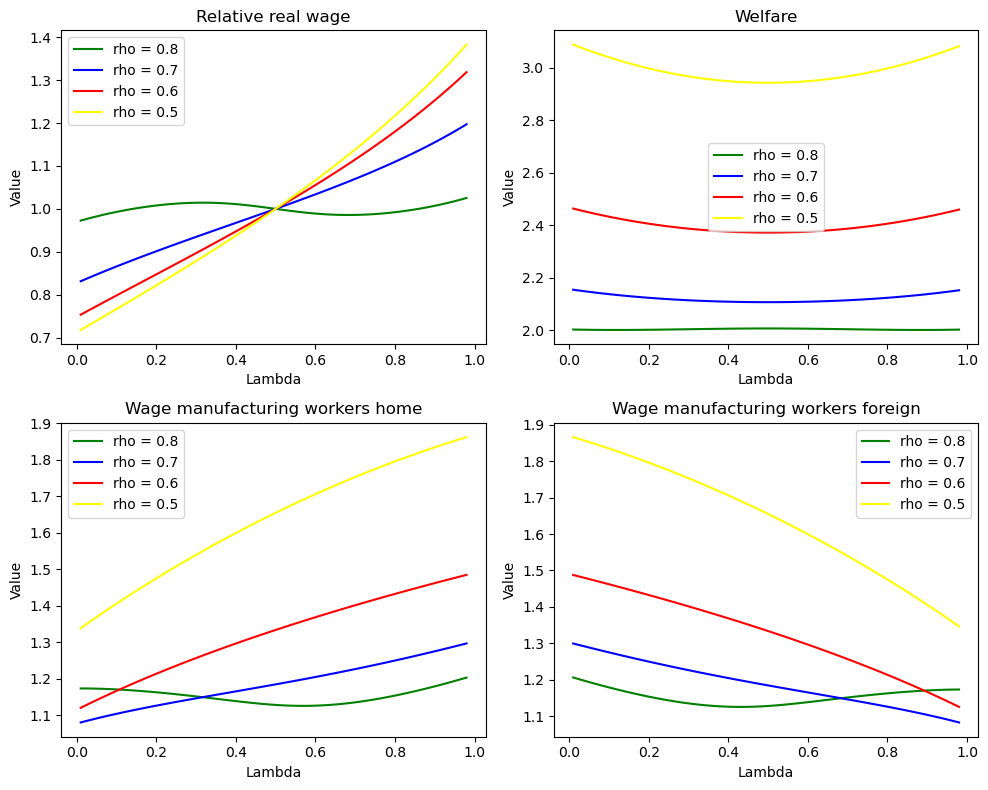

In [281]:
# Store results for multiple different rho values
gam=0.4
rho_values = [0.8, 0.7, 0.6, 0.5]
results = {}

for rho in rho_values:
    lamda = []
    Relative = [] 
    Welfare = []
    W_Man_H = []
    W_Man_F = []
    eps = 1 / (1 - rho)

    for lamh in range(lamh_min, lamh_max, lamh_step):
        lam = lamh / lamh_div

        def equations(p):
            Y1, Y2, W1, W2, I1, I2 = p
            return (
                Y1 - phi1 * (1 - gam) * L - lam * gam * L * W1,
                Y2 - (1 - phi1) * (1 - gam) * L - (1 - lam) * gam * L * W2,
                W1 - rho * bet ** (-rho) * (delta / (alp * (eps - 1))) ** (1 / eps) * 
                     (Y1 * I1 ** (eps - 1) + T ** (1 - eps) * Y2 * I2 ** (eps - 1)) ** (1 / eps),
                W2 - rho * bet ** (-rho) * (delta / (alp * (eps - 1))) ** (1 / eps) * 
                     (T ** (1 - eps) * Y1 * I1 ** (eps - 1) + Y2 * I2 ** (eps - 1)) ** (1 / eps),
                I1 - (gam * L / (alp * eps)) ** (1 / (1 - eps)) * (bet / rho) * 
                     (lam * W1 ** (1 - eps) + (1 - lam) * T ** (1 - eps) * W2 ** (1 - eps)) ** (1 / (1 - eps)),
                I2 - (gam * L / (alp * eps)) ** (1 / (1 - eps)) * (bet / rho) * 
                     (lam * T ** (1 - eps) * W1 ** (1 - eps) + (1 - lam) * W2 ** (1 - eps)) ** (1 / (1 - eps))
            )

        Y1, Y2, W1, W2, I1, I2 = fsolve(equations, (1, 1, 1, 1, 1, 1), xtol=1e-10)
        Rel = (W1 / I1 ** delta) / (W2 / I2 ** delta)
        Welf = Y1 / (I1 ** delta) + Y2 / (I2 ** delta)
        Man_H = W1 / I1 ** delta
        Man_F = W2 / I2 ** delta

        lamda.append(lam)
        Relative.append(Rel)
        Welfare.append(Welf)
        W_Man_H.append(Man_H)
        W_Man_F.append(Man_F)

    results[rho] = {
        "lamda": lamda,
        "Relative": Relative,
        "Welfare": Welfare,
        "W_Man_H": W_Man_H,
        "W_Man_F": W_Man_F
    }

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
colors = {0.8: "green", 0.7: "blue", 0.6: "red", 0.5: "yellow"}
labels = {0.8: "rho = 0.8", 0.7: "rho = 0.7", 0.6: "rho = 0.6", 0.5: "rho = 0.5"}

for rho in rho_values:
    data = results[rho]

    axs[0, 0].plot(data["lamda"], data["Relative"], color=colors[rho], label=labels[rho])
    axs[0, 1].plot(data["lamda"], data["Welfare"], color=colors[rho], label=labels[rho])
    axs[1, 0].plot(data["lamda"], data["W_Man_H"], color=colors[rho], label=labels[rho])
    axs[1, 1].plot(data["lamda"], data["W_Man_F"], color=colors[rho], label=labels[rho])

# Titles and labels
axs[0, 0].set_title("Relative real wage")
axs[0, 1].set_title("Welfare")
axs[1, 0].set_title("Wage manufacturing workers home")
axs[1, 1].set_title("Wage manufacturing workers foreign")

for ax in axs.flat:
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Value")
    ax.legend()

plt.tight_layout()
plt.show()

## Exercise 5

## Exercise 6